In [1]:
# Import necessary libraries
from simphony.libraries import siepic
from simphony.die import Die

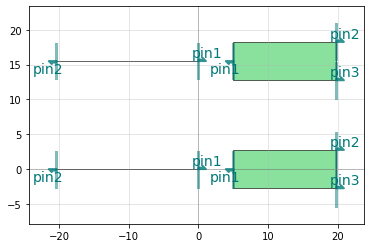

In [2]:
# Instantiate components
gc_input = siepic.GratingCoupler(name="gcinput")
y_splitter = siepic.YBranch(name="ysplit")
wg_long = siepic.Waveguide(length=150e-6, name="wglong")
wg_short = siepic.Waveguide(length=50e-6, name="wgshort")
y_recombiner = siepic.YBranch(name="yrecombiner")
gc_output = siepic.GratingCoupler(name="gcoutput")

# Instantiate Die object
die = Die(name="die1")

# Throw in the components into the Die
die.add_components([gc_input, y_splitter, wg_long, gc_output, y_recombiner, wg_short])

# Distribute the components' devices in the die in a grid
die.distribute_devices(direction='grid', shape=(3,2), spacing=(5,10))

# Visualize the grid arrangement
die.visualize()

In [3]:
# We connect the components like we would usually. Simphony will take care of the routing and
# device connections for us.

# next we connect the components to each other
# you can connect pins directly:
y_splitter["pin1"].connect(gc_input["pin1"])

# or connect components with components:
# (when using components to make connections, their first unconnected pin will
# be used to make the connection.)
y_splitter.connect(wg_long)

# or any combination of the two:
y_splitter["pin3"].connect(wg_short)
# y_splitter.connect(wg_short["pin1"])

# when making multiple connections, it is often simpler to use `multiconnect`
# multiconnect accepts components, pins, and None
# if None is passed in, the corresponding pin is skipped
y_recombiner.multiconnect(gc_output, wg_short, wg_long)

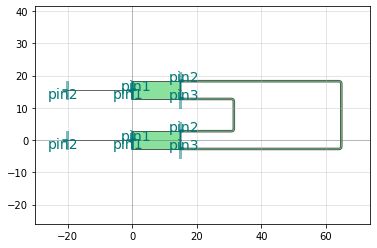

In [4]:
die.visualize() # Visualize after connecting